In [1]:
import requests
import pandas as pd

In [2]:
import dotenv

geocode_apikey = dotenv.get_variable('.env', 'GEOCODE_API')

# Location

We begin by finding the latitude and longitude of a location

In [3]:
location = "London"

In [4]:
url = f"https://geocode.maps.co/search?q={location}&api_key={geocode_apikey}"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

data = response.json()
lat = data[0]['lat']
lon = data[0]['lon']

print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 51.5074456, Longitude: -0.1277653


In [8]:
response.headers

{'Date': 'Wed, 17 Apr 2024 08:51:56 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Encoding': 'deflate'}

# Get the weather data

We are going to use the OpenWeatherMap API to get the weather data for the location we have just geocoded.

In [5]:
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current=temperature_2m&hourly=temperature_2m"
payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

temps = response.json()['hourly']['temperature_2m']
times = response.json()['hourly']['time']
print (times, temps)

['2024-04-17T00:00', '2024-04-17T01:00', '2024-04-17T02:00', '2024-04-17T03:00', '2024-04-17T04:00', '2024-04-17T05:00', '2024-04-17T06:00', '2024-04-17T07:00', '2024-04-17T08:00', '2024-04-17T09:00', '2024-04-17T10:00', '2024-04-17T11:00', '2024-04-17T12:00', '2024-04-17T13:00', '2024-04-17T14:00', '2024-04-17T15:00', '2024-04-17T16:00', '2024-04-17T17:00', '2024-04-17T18:00', '2024-04-17T19:00', '2024-04-17T20:00', '2024-04-17T21:00', '2024-04-17T22:00', '2024-04-17T23:00', '2024-04-18T00:00', '2024-04-18T01:00', '2024-04-18T02:00', '2024-04-18T03:00', '2024-04-18T04:00', '2024-04-18T05:00', '2024-04-18T06:00', '2024-04-18T07:00', '2024-04-18T08:00', '2024-04-18T09:00', '2024-04-18T10:00', '2024-04-18T11:00', '2024-04-18T12:00', '2024-04-18T13:00', '2024-04-18T14:00', '2024-04-18T15:00', '2024-04-18T16:00', '2024-04-18T17:00', '2024-04-18T18:00', '2024-04-18T19:00', '2024-04-18T20:00', '2024-04-18T21:00', '2024-04-18T22:00', '2024-04-18T23:00', '2024-04-19T00:00', '2024-04-19T01:00',

We then use the weather data to create a simple weather report.

In [6]:
df = pd.DataFrame({'time': times, 'temp': temps})

df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)

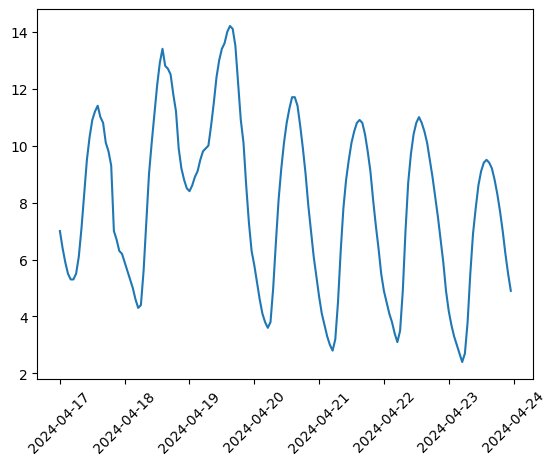

In [7]:
import matplotlib.pyplot as plt

plt.xticks(rotation=45)

plt.plot(df['temp'])